# Лабораторная работа №2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sympy import Matrix

In [2]:
m = 64
A = sp.linalg.hilbert(m)
x = np.array([1.0] * m)
b = A @ x

## Часть 1

### Точное решение

Через нахождение обратной матрицы

In [3]:
Matrix(np.linalg.inv(A) @ b)

Matrix([
[-22.1248123645782],
[ 13802.7852630615],
[-134811.267578125],
[   -1038235.78125],
[       16057473.5],
[      -30001420.0],
[     -442548032.0],
[     3468445184.0],
[   -12425500928.0],
[    26698219904.0],
[   -35885598848.0],
[    27230312064.0],
[    -3412870912.0],
[   -16138472704.0],
[    17493142656.0],
[    -6914123520.0],
[    -1308072576.0],
[     2327564096.0],
[     -344768992.0],
[    -1124061952.0],
[     1581372576.0],
[    -1131713280.0],
[      359441840.0],
[      -13345728.0],
[       20192128.0],
[      -62579520.0],
[       88908528.0],
[      -56772352.0],
[       -7080064.0],
[       11238016.0],
[        9814784.0],
[        3852800.0],
[      -16517376.0],
[        3589760.0],
[        4620160.0],
[       -1988224.0],
[         916096.0],
[        -606208.0],
[         609440.0],
[        -498880.0],
[        -188704.0],
[          10944.0],
[         142208.0],
[         155000.0],
[        -205768.0],
[         111360.0],
[         -36480.0],
[   

### Решение методом градиентного спуска

In [4]:
def f(x):
    return 1 / 2 * x.T @ A @ x - b.T @ x

In [5]:
def gradient(x):
    return A @ x - b

In [6]:
sol = np.array([0.0] * m)
err = np.inf
k = 0
h = 0.01
err_gd = []
while err > 0.01:
    sol = sol - h * gradient(sol)
    err = np.linalg.norm(gradient(sol))
    err_gd.append(err)
    k += 1

In [7]:
k

3994

In [8]:
Matrix(sol)

Matrix([
[ 1.03228393433664],
[0.992114574538326],
[0.947644618871148],
[0.933498617637096],
[0.936492088247347],
[0.947827091296479],
[0.962690624746745],
[0.978507086473109],
[0.993912023311288],
[ 1.00820444091197],
[ 1.02105262630593],
[ 1.03233233703032],
[ 1.04203561876863],
[ 1.05021838680978],
[ 1.05696986534254],
[ 1.06239464573267],
[ 1.06660217289535],
[ 1.06970067027473],
[ 1.07179374453276],
[ 1.07297861623209],
[ 1.07334533588307],
[ 1.07297659140271],
[ 1.07194786280725],
[ 1.07032777218563],
[ 1.06817853445155],
[ 1.06555645048591],
[ 1.06251240712788],
[ 1.05909236297703],
[ 1.05533780817465],
[ 1.05128619215201],
[ 1.04697131697256],
[ 1.04242369612971],
[ 1.03767087998896],
[ 1.03273774980664],
[ 1.02764678262789],
[ 1.02241828950182],
[ 1.01707062944174],
[  1.0116204014624],
[ 1.00608261688155],
[ 1.00047085390657],
[0.994797396350633],
[0.989073358150405],
[0.983308795191204],
[0.977512805791021],
[0.971693621052077],
[0.965858686159051],
[0.960014733585767],
[ 0.

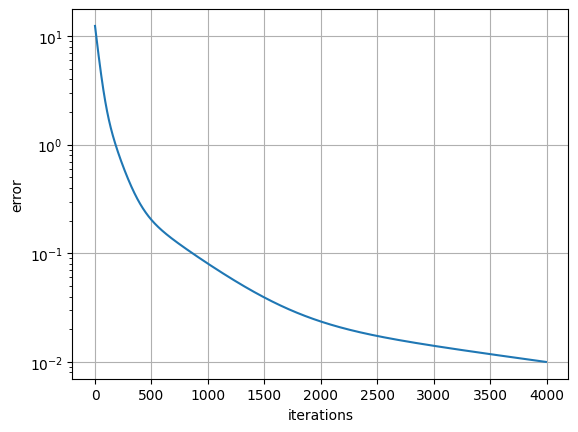

In [30]:
plt.semilogy(range(len(err_gd)), err_gd, label = 'GD')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

### Решение методом сопряженных градиентов

Метод Хестенса-Штифеля

In [9]:
X = [0] * (m + 1)
X[0] = np.array([0.0] * m)
G = [0] * (m + 1)
G[0] = A @ X[0] - b
S = [0] * (m + 2)
S[1]= -G[0]
a = [0] * (m + 1)
alpha = [0] * (m + 1)
beta = [0] * (m + 1)
err_hs = []

In [10]:
for k in range(1, m + 1):
    a[k] = A @ S[k]
    alpha[k] = -(G[k - 1] @ S[k]) / (a[k] @ S[k])
    X[k] = X[k - 1] + alpha[k] * S[k]
    G[k] = A @ X[k] - b
    beta[k] = G[k] @ a[k] / (S[k] @ a[k])
    S[k + 1] = -G[k] + beta[k] * S[k]
    err_hs.append(np.linalg.norm(X[k] - x))

In [11]:
Matrix(X[-1])

Matrix([
[ 1.00000006061421],
[0.999997512458569],
[  1.0000242860204],
[0.999915524930181],
[ 1.00008956403182],
[ 1.00004565958666],
[ 0.99995492249274],
[0.999926179295806],
[ 0.99995607679661],
[ 1.00000621702206],
[ 1.00004618862159],
[ 1.00006304785993],
[ 1.00005722866896],
[ 1.00003588381354],
[ 1.00000779650645],
[0.999980507668592],
[0.999959168773978],
[0.999946428909197],
[0.999942850256685],
[0.999947535698606],
[0.999958680502413],
[0.999974084526091],
[0.999991535754626],
[  1.0000090198997],
[ 1.00002490235181],
[ 1.00003795338558],
[ 1.00004734921328],
[  1.0000527311733],
[   1.000054018829],
[ 1.00005146241489],
[ 1.00004549036159],
[ 1.00003673514668],
[ 1.00002587966696],
[ 1.00001368052623],
[ 1.00000088755807],
[ 0.99998821254275],
[0.999976304882265],
[0.999965745272717],
[0.999957010645344],
[0.999950466627765],
[0.999946375035578],
[0.999944888413418],
[0.999946052993938],
[0.999949811579006],
[0.999956010085903],
[0.999964390997793],
[ 0.99997462253539],
[0.9

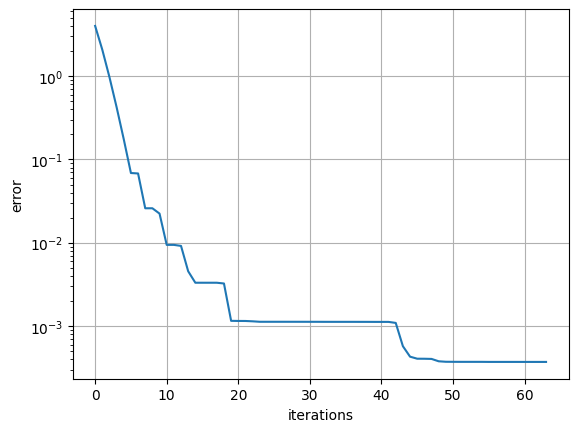

In [29]:
plt.semilogy(range(len(err_hs)), err_hs, label = 'HS')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

## Часть 2

### Решение методом сопряженных градиентов

Метод Флетчера-Ривса

In [40]:
X = np.array([0.0] * m)
G = A @ X - b
G_prev = 0
S = -G
err_fr = []
err = np.inf
k = 1
while err > 0.0005:
    a = A @ S
    alpha = -(G @ S) / (a @ S)
    G_prev = G
    X = X + alpha * S
    G = A @ X - b
    beta = (G @ G) / (G_prev @ G_prev)
    S = -G + beta * S
    err = np.linalg.norm(X - x)
    err_fr.append(err)
    k += 1

In [41]:
k

42

In [42]:
Matrix(X)

Matrix([
[ 1.00000004231321],
[0.999997496945563],
[ 1.00002461584909],
[0.999915679424927],
[ 1.00008889271766],
[ 1.00004509052029],
[0.999954863748015],
[0.999926507245051],
[0.999956542193021],
[ 1.00000661869424],
[ 1.00004642938988],
[ 1.00006311660625],
[ 1.00005716059625],
[ 1.00003573547177],
[  1.0000076182662],
[0.999980348053859],
[0.999959050401811],
[0.999946363145141],
[0.999942839674174],
[0.999947562783151],
[0.999958729280921],
[0.999974149872933],
[0.999991606259127],
[  1.0000090762239],
[ 1.00002493364736],
[ 1.00003795202443],
[ 1.00004731351389],
[ 1.00005265764717],
[ 1.00005390930455],
[ 1.00005132055326],
[  1.0000453298198],
[ 1.00003655706529],
[ 1.00002569390911],
[ 1.00001350172421],
[ 1.00000072206461],
[0.999988058897432],
[0.999976185302586],
[0.999965663304234],
[0.999956968133605],
[0.999950469787526],
[0.999946426761858],
[0.999944994386833],
[0.999946209959321],
[0.999950020042711],
[0.999956267109534],
[0.999964688449226],
[ 0.99997495679269],
[0.9

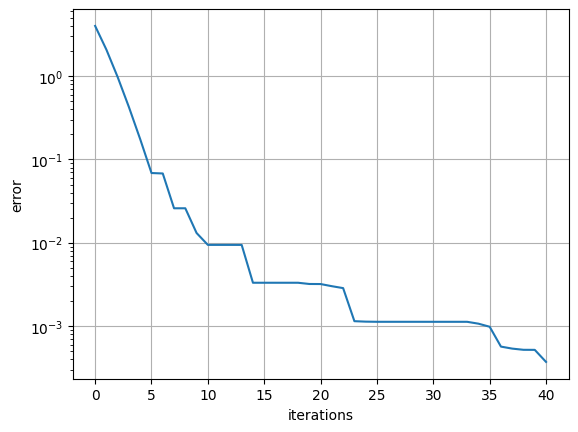

In [43]:
plt.semilogy(range(len(err_fr)), err_fr, label = 'FR')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

## Часть 3

### Метод тяжелого шарика

In [15]:
X =[np.array([0.0] * m), np.array([0.0] * m)]
err_hb = []
err = np.inf
k = 2
while err > 0.01:
    alpha = 0.9
    beta = 0.9
    X.append(X[k - 1] - alpha * gradient(X[k - 1]) + beta * (X[k - 1] - X[k - 2]))
    err = np.linalg.norm(X[k] - x)
    err_hb.append(err)
    k += 1

In [17]:
k

10605

In [16]:
Matrix(X[-1])

Matrix([
[ 1.00001901314877],
[0.999830994676693],
[0.999872617492156],
[ 1.00111416729931],
[ 1.00038989838975],
[0.999332315583113],
[0.998776219589285],
[0.998807755125932],
[0.999233851473101],
[0.999828389068347],
[ 1.00041850449161],
[ 1.00089865771969],
[ 1.00121923507153],
[ 1.00136974654859],
[ 1.00136386864704],
[ 1.00122818956962],
[ 1.00099450602284],
[ 1.00069493412619],
[ 1.00035905383162],
[ 1.00001243870489],
[0.999676084313293],
[   0.999366390518],
[0.999095463175726],
[0.998871580125061],
[ 0.99869972345515],
[0.998582117256504],
[0.998518736225392],
[ 0.99850776713146],
[0.998546014436191],
[0.998629250048922],
[0.998752508437805],
[0.998910332428073],
[0.999096974440915],
[0.999306559266206],
[0.999533213328378],
[0.999771165867568],
[ 1.00001482635955],
[ 1.00025884223358],
[ 1.00049814027961],
[ 1.00072795489996],
[ 1.00094384558418],
[ 1.00114170584471],
[ 1.00131776529083],
[ 1.00146858644194],
[ 1.00159105747767],
[ 1.00168238187224],
[ 1.00174006586259],
[ 1.

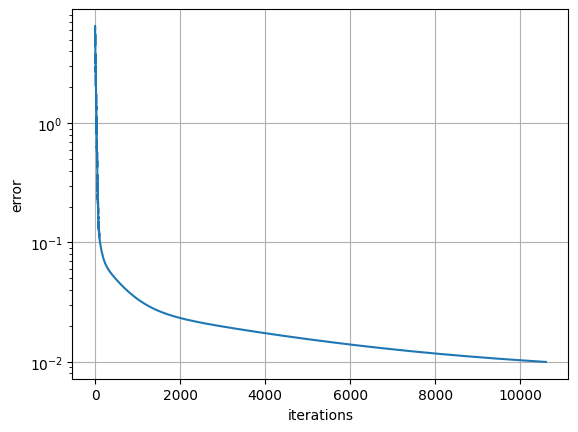

In [27]:
plt.semilogy(range(len(err_hb)), err_hb, label = 'HB')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

# Сравнение сходимости методов

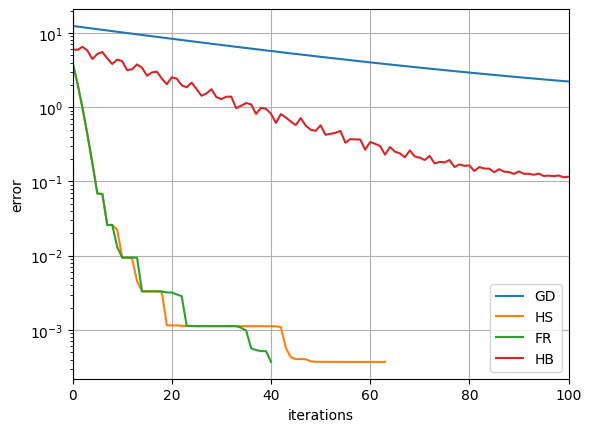

In [44]:
plt.semilogy(range(len(err_gd)), err_gd, label = 'GD')
plt.semilogy(range(len(err_hs)), err_hs, label = 'HS')
plt.semilogy(range(len(err_fr)), err_fr, label = 'FR')
plt.semilogy(range(len(err_hb)), err_hb, label = 'HB')
plt.xlabel('iterations')
plt.ylabel('error')
plt.xlim(0, 100)
plt.legend()
plt.grid(True)